In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, simplify, expand

In [ ]:
def lagrange_interpolacion_simbolico(x, y):
    """
    Calcula el polinomio de interpolación de Lagrange en forma simbólica.

    Parámetros:
    x : array de valores x de la tabla
    y : array de valores y de la tabla

    Salida:
    polinomio : expresión simbólica del polinomio de Lagrange
    """
    n = len(x)
    xi = symbols('x')  # Variable simbólica para el polinomio
    polinomio = 0

    for i in range(n):
        # Calcula el término de Lagrange L_i(x)
        L_i = 1
        for j in range(n):
            if i != j:
                L_i *= (xi - x[j]) / (x[i] - x[j])
        # Suma el término al polinomio
        polinomio += y[i] * L_i

    return expand(simplify(polinomio))

def lagrange_interpolacion(x, y, x_eval):
    """
    Evalúa el polinomio de interpolación de Lagrange en puntos dados.

    Parámetros:
    x : array de valores x de la tabla
    y : array de valores y de la tabla
    x_eval : valores en los que se evalúa el polinomio

    Salida:
    p : valores del polinomio en x_eval
    """
    n = len(x)
    p = np.zeros_like(x_eval, dtype=float)

    for i in range(n):
        # Calcula el término de Lagrange L_i(x)
        L_i = np.ones_like(x_eval, dtype=float)
        for j in range(n):
            if i != j:
                L_i *= (x_eval - x[j]) / (x[i] - x[j])
        # Suma el término al polinomio
        p += y[i] * L_i

    return p

In [ ]:
# tabla de datos
x = np.array([1, 2, 3, 4])  # Valores de x
y = np.array([5, 2, -1, 0])  # Valores de y

In [ ]:
# Generar el polinomio simbólico
polinomio_simbolico = lagrange_interpolacion_simbolico(x, y)
print("El polinomio de interpolación de Lagrange es:")
print(polinomio_simbolico)

In [ ]:
# Dominio para graficar el polinomio
x_eval = np.linspace(min(x), max(x), 500)
p_eval = lagrange_interpolacion(x, y, x_eval)

El polinomio de interpolación de Lagrange es:
2*x**3/3 - 4*x**2 + 13*x/3 + 4


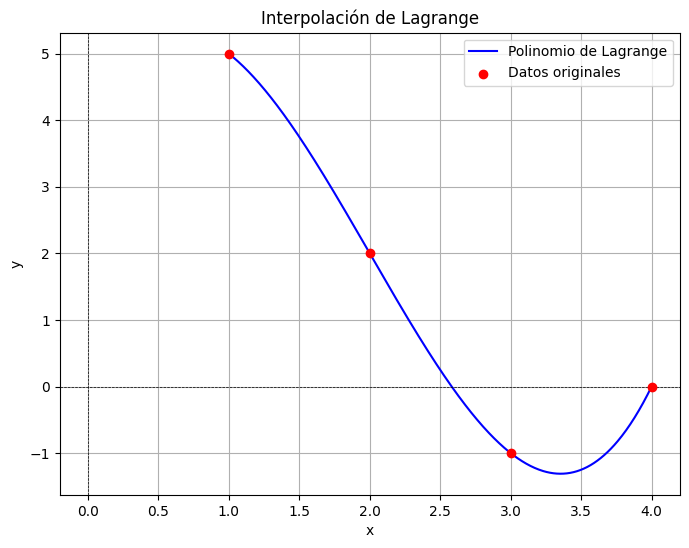

In [3]:
# Gráfica del polinomio y los puntos originales
plt.figure(figsize=(8, 6))
plt.plot(x_eval, p_eval, label="Polinomio de Lagrange", color="blue")
plt.scatter(x, y, color="red", label="Datos originales", zorder=5)
plt.title("Interpolación de Lagrange")
plt.xlabel("x")
plt.ylabel("y")
plt.axhline(0, color="black", linewidth=0.5, linestyle="--")
plt.axvline(0, color="black", linewidth=0.5, linestyle="--")
plt.legend()
plt.grid(True)
plt.show()